In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

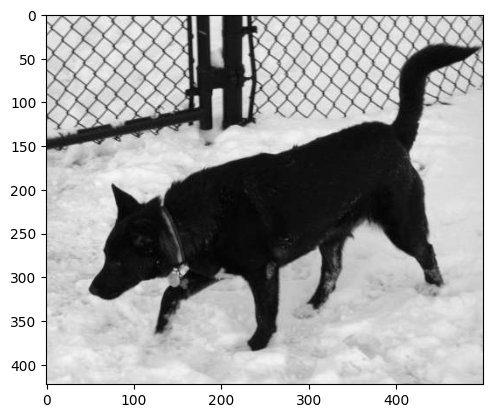

In [7]:
DATADIR = "/home/dario/Documents/Machine_Learning_Studies/kagglecatsanddogs_5340/PetImages/"
CATEGORIES = ["Dog", "Cat"]

for categories in CATEGORIES:
    path = os.path.join(DATADIR, categories) # path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # gray scale so its not a vector for pixel
        plt.imshow(img_array, cmap="gray")
        plt.show
        break
    break


In [10]:
print(img_array,"\n") # see the values of pixels
print(img_array.shape) # see the shape of the img

[[168 167 166 ... 156 152 152]
 [163 166 168 ... 138 161 158]
 [159 163 168 ... 106 140 154]
 ...
 [163 164 165 ... 147 147 147]
 [166 167 169 ... 146 146 146]
 [168 169 171 ... 145 145 145]] 

(423, 500)


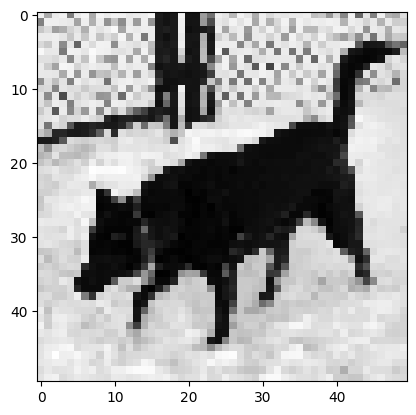

In [19]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [21]:
training_data = []

def create_training_data(): #made it a func
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # gray scale so its not a vector for pixel
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e: # in case the img is corrupted
                pass

create_training_data() # call it

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


In [22]:
print(len(training_data)) # data to learn

24946


In [23]:
import random
random.shuffle(training_data) # shuffle the data

In [24]:
print(training_data[1])

[array([[238, 235, 195, ..., 105,  61, 131],
       [230, 229, 183, ...,  92,  76, 104],
       [235, 226, 234, ...,  34,  34,  40],
       ...,
       [ 90, 104, 106, ..., 236, 240, 227],
       [105, 123, 126, ..., 235, 235, 239],
       [ 24, 128, 130, ..., 232, 232, 236]], dtype=uint8), 1]


In [25]:
X = []
y = []


In [26]:
for features, label in training_data: # add the 
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # cant pass list to NN, so (any number, x axis, y axis, color[gray])

In [27]:
import pickle # you can save it with pickle for latter (wtf is pickle)

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [29]:
pickle_in = open("X.pickle", "rb")
x_train = pickle.load(pickle_in)

In [32]:
len(x_train)

24946